In [1]:
!python --version

Python 3.12.7


In [1]:
import pandas as pd
import numpy as np

### IMPORT ROBERTA MODEL

In [6]:
import tweetnlp
import torch
from tqdm import tqdm
device = torch.device('cuda')

# Load the CardiffNLP RoBERTa model for hate detection
roberta = tweetnlp.Classifier("cardiffnlp/twitter-roberta-base-hate-latest",max_length=512)

# Function to get predictions from the model one sentence at a time
def get_predictions(model, texts):
    predictions = []
    for text in tqdm(texts, desc="Processing texts"):
        prediction = roberta.predict(text)['label']
        predictions.append(prediction)
    return predictions

D:\Anaconda\Lib\site-packages\transformers\models\auto\configuration_auto.py:1006: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
D:\Anaconda\Lib\site-packages\transformers\models\auto\tokenization_auto.py:810: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
D:\Anaconda\Lib\site-packages\transformers\models\auto\auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


### DATASET 1: BIAS_CORP

In [4]:
bias_corp = pd.read_csv("bias_corp_racial.csv")
bias_corp.head()

,text,bias_1,bias_2,bias_3,confidence_1,confidence_2,confidence_3,time_1,time_2,time_3,sentiment_score,source
0,"'' Democrats needed someone like Obama, half w...",4,3,2,4,3,5,82,94,295,0.205548,BB
1,'Greatest threat to the Black Famiky is the wh...,1,3,4,6,6,4,48,37,23,-0.189737,BB
2,"'In March, Black Lives Matter activists marche...",3,3,2,7,7,7,140,2495,75,-0.282843,BB
3,"'Rogue'' Chinese Virologist Joins Twitter, Pub...",5,4,3,8,9,7,3900,6838,85,-0.094491,BB
4,'What this means is he could have told black p...,2,3,3,8,7,6,9302,4203,43,-0.347440,BB


In [7]:
df = bias_corp.copy()

In [10]:
df.head()

,text,bias_1,bias_2,bias_3,confidence_1,confidence_2,confidence_3,time_1,time_2,time_3,sentiment_score,source,weighted_bias,true_label
0,"'' Democrats needed someone like Obama, half w...",4,3,2,4,3,5,82,94,295,0.205548,BB,2.916667,0
1,'Greatest threat to the Black Famiky is the wh...,1,3,4,6,6,4,48,37,23,-0.189737,BB,2.500000,0
2,"'In March, Black Lives Matter activists marche...",3,3,2,7,7,7,140,2495,75,-0.282843,BB,2.666667,0
3,"'Rogue'' Chinese Virologist Joins Twitter, Pub...",5,4,3,8,9,7,3900,6838,85,-0.094491,BB,4.041667,1
4,'What this means is he could have told black p...,2,3,3,8,7,6,9302,4203,43,-0.347440,BB,2.619048,0


In [ ]:
# Get predictions for the dataset
df['troberta_prediction'] = get_predictions(troberta, df['text'])
df.head()

In [23]:
print(df['troberta_prediction'].value_counts())
print(df['true_label'].value_counts())

troberta_prediction
NOT-HATE    38948
HATE         4784
Name: count, dtype: int64
true_label
0    22622
1    21110
Name: count, dtype: int64


In [25]:
df.to_csv('roberta_results.csv',index=False)

In [ ]:
df['troberta_prediction'].value_counts()

### DATASET 2: SAKREN TWITTER DATASET

In [44]:
from datasets import load_dataset

sakren = load_dataset("sakren/twitter_racism_dataset")

In [50]:
sakren = sakren['train'].to_pandas()

In [52]:
sakren.head()

,index,id,Text,Annotation,oh_label
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0


In [54]:
def get_predictions(model, texts):
    predictions = []
    for text in tqdm(texts, desc="Processing texts"):
        prediction = roberta.predict(text)['label']
        predictions.append(prediction)
    return predictions

# Get predictions for the dataset
sakren['roberta_sakren'] = get_predictions(roberta, sakren['Text'])
sakren.head()

Processing texts: 100%|██████████████████████████████████████████████████████████| 13471/13471 [04:11<00:00, 53.57it/s]


,index,id,Text,Annotation,oh_label,roberta_sakren
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1,NOT-HATE
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0,NOT-HATE
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1,HATE
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0,NOT-HATE
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0,NOT-HATE


In [56]:
# Experimenting cardiffnlp roberta because it has been trained using racism dataset also. Changing labels to test accuracy on racism dataset.
sakren['roberta_sakren'].replace({"HATE": "racism", "NOT-HATE": "none"},inplace=True)

C:\Users\MUDIT BAID\AppData\Local\Temp\ipykernel_10632\4294934485.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sakren['roberta_sakren'].replace({"HATE": "racism", "NOT-HATE": "none"},inplace=True)


In [78]:
sakren.head()

,index,id,Text,Annotation,oh_label,roberta_sakren
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1,none
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0,none
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1,racism
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0,none
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0,none


In [60]:
sakren.to_csv('roberta_sakren.csv',index=False)

Accuracy: 0.8693
F1 Score: 0.4909
Confusion Matrix:
[[10861   640]
 [ 1121   849]]


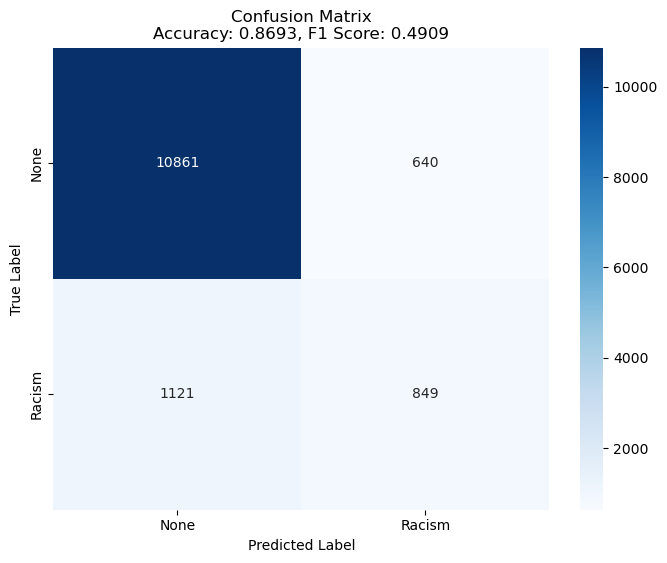

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Map 'roberta_sakren' to binary values
sakren['pred_label'] = sakren['roberta_sakren'].map({"none": 0, "racism": 1})

# Calculate metrics
accuracy = accuracy_score(sakren['oh_label'], sakren['pred_label'])
f1 = f1_score(sakren['oh_label'], sakren['pred_label'])
conf_matrix = confusion_matrix(sakren['oh_label'], sakren['pred_label'])

# Display metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["None", "Racism"], yticklabels=["None", "Racism"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()


### DATASET 3: KAGGLE TWITTER

In [9]:
kaggle_racism = pd.read_csv("D:/OneDrive - University of Georgia/UGA/Dr. Itai/Racism/racism_kaggle/racism1.csv",low_memory=False)

In [11]:
kaggle_racism.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,...,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,cleanText,TextBlob Score,TextBlob Sentiment
0,0,1.400600e+18,1.400210e+18,2021-06-03 18:59:56 Central Daylight Time,6/3/2021,18:59:56,-500,9.292310e+17,rayne_katsune,Rayne ã€ŒThe Nuisanceã€ Katsune ã‚µã‚¿ã‚¢ãƒ«,...,NaN,NaN,"[{'screen_name': 'HyperSnoc', 'name': 'Your Lo...",NaN,NaN,NaN,NaN,hypersnoc echo im_not_kit racism,0.00,Neutral
1,1,1.400600e+18,1.397240e+18,2021-06-03 18:59:55 Central Daylight Time,6/3/2021,18:59:55,-500,5.791119e+08,tonyhasanidea,no one you know,...,NaN,NaN,"[{'screen_name': 'manoutdoors4', 'name': 'Stoi...",NaN,NaN,NaN,NaN,manoutdoor aj_lady_liberti fbiwfo thejusticede...,0.05,Positive
2,2,1.400600e+18,1.400600e+18,2021-06-03 18:59:46 Central Daylight Time,6/3/2021,18:59:46,-500,3.098130e+09,americanist4u,Americanist (Racism and treason are not patrio...,...,NaN,NaN,[],NaN,NaN,NaN,NaN,trumpisnotwel,0.00,Neutral
3,3,1.400600e+18,1.400590e+18,2021-06-03 18:59:44 Central Daylight Time,6/3/2021,18:59:44,-500,1.084560e+18,mimizwei,MimiRocheðŸ›¡,...,NaN,NaN,"[{'screen_name': 'KateWilliamsme', 'name': 'Pr...",NaN,NaN,NaN,NaN,katewilliamsm annabeth ðÿš racism exempt queen...,0.00,Neutral
4,4,1.400600e+18,1.400600e+18,2021-06-03 18:59:42 Central Daylight Time,6/3/2021,18:59:42,-500,3.071625e+09,goseemickeyron,Honored to be a Disney Legend,...,NaN,NaN,"[{'screen_name': 'WGNNews', 'name': 'WGN TV Ne...",NaN,NaN,NaN,NaN,wgnnew critic race theoryâ noth teach hatr big...,0.00,Neutral


In [13]:
kaggle = kaggle_racism[['date','tweet','cleanText','TextBlob Sentiment']]

In [25]:
kaggle.dropna(inplace=True)
kaggle.head()

,date,tweet,cleanText,TextBlob Sentiment
0,6/3/2021,@HyperSnoc @Echo31334604 @im_not_kit Racism h...,hypersnoc echo im_not_kit racism,Neutral
1,6/3/2021,@manoutdoors4 @AJ_Lady_Liberty @FBIWFO @TheJus...,manoutdoor aj_lady_liberti fbiwfo thejusticede...,Positive
2,6/3/2021,#TrumpIsNotWell https://t.co/JJl8j4dRK9,trumpisnotwel,Neutral
3,6/3/2021,"@KateWilliamsme @AnnaBethS4 ðŸš¨ ""Racism is ex...",katewilliamsm annabeth ðÿš racism exempt queen...,Neutral
4,6/3/2021,@WGNNews â€˜Critical race theoryâ€™ is nothing...,wgnnew critic race theoryâ noth teach hatr big...,Neutral


In [27]:
kaggle['prediction'] = get_predictions(roberta, kaggle['tweet'])

Processing texts: 100%|██████████████████████████████████████████████████████| 169648/169648 [1:03:10<00:00, 44.76it/s]
C:\Users\MUDIT BAID\AppData\Local\Temp\ipykernel_19756\1810345292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaggle['prediction'] = get_predictions(roberta, kaggle['tweet'])


In [38]:
kaggle.head()

NameError: name 'kaggle' is not defined

In [19]:
kaggle['tweet'].tolist()[234:236]

['Systemic racism does not exiâ€”', nan]

In [31]:
kaggle.to_csv("roberta_kaggle.csv",index=False)

### DATASET 4: TWITTER RACISM DATASET

In [9]:
from datasets import load_dataset

ds = load_dataset("tweets-hate-speech-detection/tweets_hate_speech_detection")

README.md:   0%|          | 0.00/5.58k [00:00<?, ?B/s]

D:\Anaconda\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\hf_cache\hub\datasets--tweets-hate-speech-detection--tweets_hate_speech_detection. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


train-00000-of-00001.parquet:   0%|          | 0.00/2.07M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31962 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/17197 [00:00<?, ? examples/s]

In [11]:
ds

DatasetDict({
    train: Dataset({
        features: ['label', 'tweet'],
        num_rows: 31962
    })
    test: Dataset({
        features: ['label', 'tweet'],
        num_rows: 17197
    })
})

In [31]:
twitter = ds['train'].to_pandas()

In [33]:
twitter.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [37]:
twitter['prediction'] = get_predictions(roberta,twitter['tweet'])
twitter.head()

Processing texts: 100%|██████████████████████████████████████████████████████████| 31962/31962 [13:02<00:00, 40.84it/s]


,label,tweet,prediction
0,0,@user when a father is dysfunctional and is so...,NOT-HATE
1,0,@user @user thanks for #lyft credit i can't us...,NOT-HATE
2,0,bihday your majesty,NOT-HATE
3,0,#model i love u take with u all the time in ...,NOT-HATE
4,0,factsguide: society now #motivation,NOT-HATE


In [68]:
print('label counts: ',twitter['label'].value_counts())
print('prediction counts: ',twitter['prediction'].value_counts())

label counts:  label
0    29720
1     2242
Name: count, dtype: int64
prediction counts:  prediction
not_racism    30512
racism         1450
Name: count, dtype: int64


In [40]:
twitter.to_csv('roberta_twitter.csv',index=False)

In [72]:
twitter.head()

,label,tweet,prediction,prediction_binary
0,0,@user when a father is dysfunctional and is so...,not_racism,0
1,0,@user @user thanks for #lyft credit i can't us...,not_racism,0
2,0,bihday your majesty,not_racism,0
3,0,#model i love u take with u all the time in ...,not_racism,0
4,0,factsguide: society now #motivation,not_racism,0


Accuracy: 0.9103
F1 Score: 0.2232
Confusion Matrix:
[[28682  1038]
 [ 1830   412]]


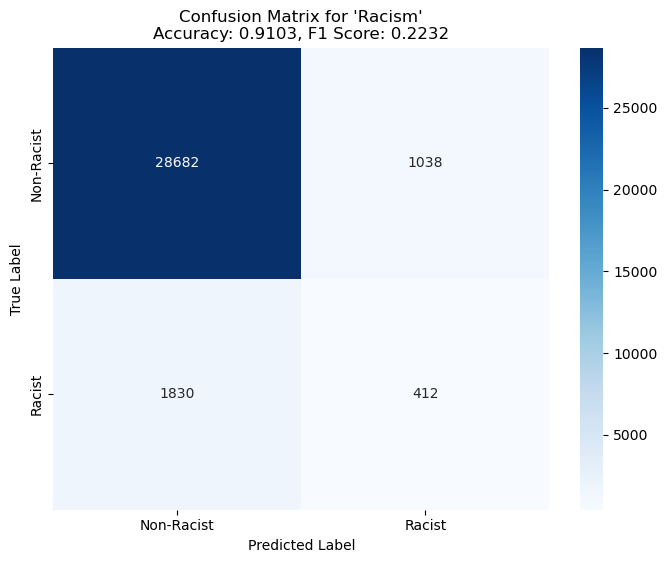

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# # Replace prediction values in twitter DataFrame
# twitter['prediction'] = twitter['prediction'].replace({"NOT-HATE": "not_racism", "HATE": "racism"})

# # Convert twitter['prediction'] to binary integer
# twitter['prediction_binary'] = twitter['prediction'].map({"racism": 1, "not_racism": 0})

# racism_filter = twitter['label'] == 1

# Calculate Metrics for 'racism' only
accuracy = accuracy_score(twitter['label'], twitter['prediction_binary'])
f1 = f1_score(twitter['label'], twitter['prediction_binary'])
conf_matrix = confusion_matrix(twitter['label'], twitter['prediction_binary'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix for 'Racism'\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()